11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 0.3082 - val_loss: 0.1700
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1627 - val_loss: 0.1469
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1462 - val_loss: 0.1383
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1378 - val_loss: 0.1337
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1326 - val_loss: 0.1286
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1293 - val_loss: 0.1261
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1263 - val_loss: 0.1235
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1244 - val_loss: 0.1219
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1226 - val_loss: 0.1222
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1216 - val_loss: 0.1193
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1201 - val_loss: 0.118

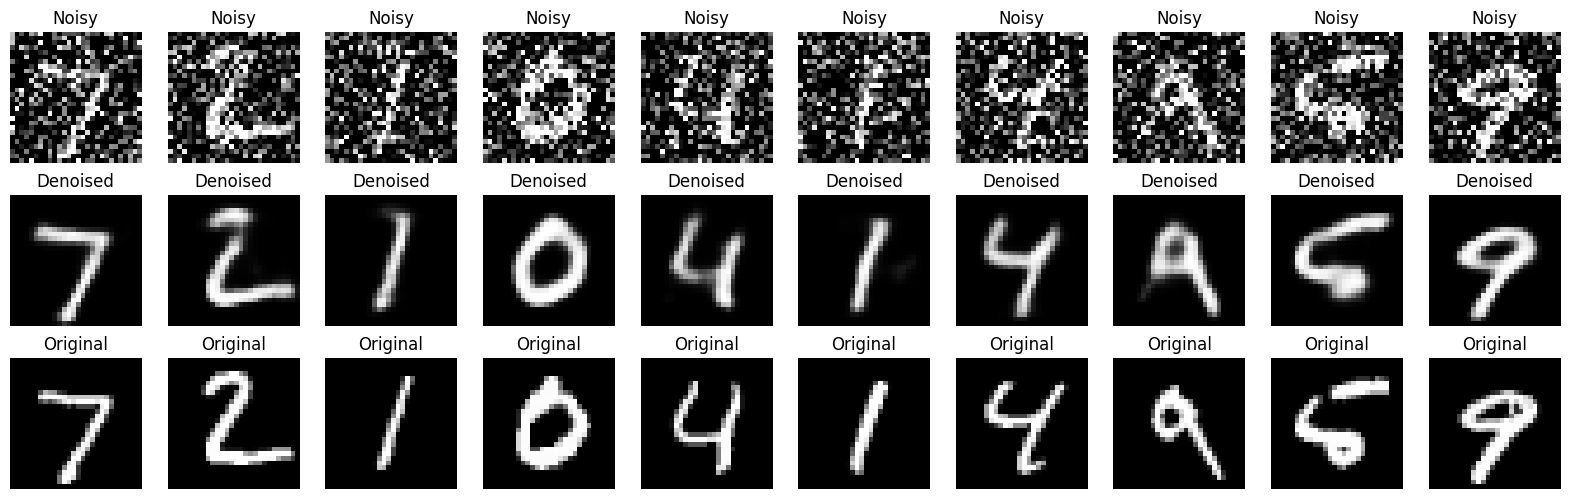

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#Add Gaussian Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Define the Autoencoder
input_img = keras.Input(shape=(28, 28, 1))

#Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#Build and Compile the Denoising Autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Train on noisy inputs, target is clean
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

#Predict on noisy test images
denoised_imgs = autoencoder.predict(x_test_noisy)

#Visualize Noisy vs Denoised vs Original
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    #Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    #Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    #Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
plt.show()
